In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
dataset = "./model/kp_classifier.csv"
model_save_path = "./model/kp_classifier.hdf5"
tflite_save_path = "./model/kp_classifier.tflite"

In [3]:
NUM_CLASSES = 36

In [4]:
x = np.loadtxt(dataset, delimiter=",", dtype='float32', skiprows=1, usecols=list(range(1, (21 * 3) + 1)))
y = np.loadtxt(dataset, delimiter=",", dtype='int32', skiprows=1, usecols=(0))

In [5]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 3, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 63)                0         
                                                                 
 dense (Dense)               (None, 20)                1280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 36)                396       
                                                                 
Total params: 1886 (7.37 KB)
Trainable params: 1886 (7.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True, monitor='val_accuracy', mode='max'
)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/12 [=>............................] - ETA: 12s - loss: 3.5793 - accuracy: 0.0312
Epoch 1: val_accuracy improved from -inf to 0.02395, saving model to ./model\kp_classifier.hdf5
12/12 [==============================] - 1s 31ms/step - loss: 3.5743 - accuracy: 0.0340 - val_loss: 3.5491 - val_accuracy: 0.0240
Epoch 2/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.5683 - accuracy: 0.0312
Epoch 2: val_accuracy improved from 0.02395 to 0.04990, saving model to ./model\kp_classifier.hdf5
12/12 [==============================] - 0s 6ms/step - loss: 3.5531 - accuracy: 0.0380 - val_loss: 3.5268 - val_accuracy: 0.0499
Epoch 3/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.5583 - accuracy: 0.0391
Epoch 3: val_accuracy improved from 0.04990 to 0.08184, saving model to ./model\kp_classifier.hdf5
12/12 [==============================] - 0s 6ms/step - loss: 3.5340 - accuracy: 0.0520 - val_loss: 3.5040 - val_accuracy: 0.0818


d:\BINUS\Assignments\Semester 3\AI\SignoAI\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.5132 - accuracy: 0.0547
Epoch 4: val_accuracy improved from 0.08184 to 0.09581, saving model to ./model\kp_classifier.hdf5
12/12 [==============================] - 0s 6ms/step - loss: 3.5112 - accuracy: 0.0553 - val_loss: 3.4784 - val_accuracy: 0.0958
Epoch 5/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.5059 - accuracy: 0.0469
Epoch 5: val_accuracy improved from 0.09581 to 0.12575, saving model to ./model\kp_classifier.hdf5
12/12 [==============================] - 0s 6ms/step - loss: 3.4950 - accuracy: 0.0620 - val_loss: 3.4481 - val_accuracy: 0.1257
Epoch 6/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.4683 - accuracy: 0.0234
Epoch 6: val_accuracy did not improve from 0.12575
12/12 [==============================] - 0s 5ms/step - loss: 3.4577 - accuracy: 0.0713 - val_loss: 3.4110 - val_accuracy: 0.1257
Epoch 7/1000
 1/12 [=>............................] - ETA: 0s - loss: 3.4985

In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=128)

4/4 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.8802


In [11]:
model = tf.keras.models.load_model(model_save_path)

In [12]:
print(np.array([x_test[24]]))

[[ 0.0098663   0.956963    0.0150986   0.21915998  0.7659997  -0.1676402
   0.17950019  0.46948805 -0.40810955 -0.09960476  0.16587618 -0.5145438
  -0.38834637 -0.05185343 -0.36437097  0.2299003  -0.03018218 -0.10236242
   0.29828066 -0.33802134 -0.19002743  0.3285288  -0.588163   -0.24315976
   0.33095878 -0.8111216  -0.34757483  0.02448051 -0.08161858  0.05007136
   0.00879964 -0.49580288  0.05305604  0.00406761 -0.7452922  -0.05046683
  -0.0179214  -1.         -0.2633567  -0.1619485   0.01194787  0.06245303
  -0.30150482 -0.32077593 -0.06538994 -0.34234872 -0.5413856  -0.268708
  -0.4024452  -0.7566281  -0.49470243 -0.35141537  0.19640154  0.08709393
  -0.29578707  0.0897393  -0.0870325  -0.22131918  0.18603012 -0.2634412
  -0.18556915  0.32598954 -0.36380878]]


In [13]:
predict_result = model.predict(np.array([x_test[24]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 93ms/step
[2.11022680e-07 2.42909332e-10 2.41467473e-03 4.56409702e-11
 4.32692422e-03 3.78331861e-05 4.74308997e-01 2.44904004e-06
 7.03862213e-08 2.29243710e-07 2.61498068e-09 9.21803340e-03
 1.09319299e-05 6.84196588e-10 1.73475128e-05 6.79478092e-07
 4.45434716e-06 2.61270528e-04 5.95142945e-12 1.66451797e-09
 2.35975021e-05 8.28178926e-15 1.21481335e-05 1.12498221e-07
 2.46837749e-06 1.48055897e-05 2.76823044e-07 5.02909813e-03
 1.94412042e-08 3.24051683e-08 7.22212996e-03 1.39584765e-03
 4.95689511e-01 1.96596989e-06 9.04534114e-10 3.83570796e-06]
32


16/16 [==============================] - 0s 1ms/step


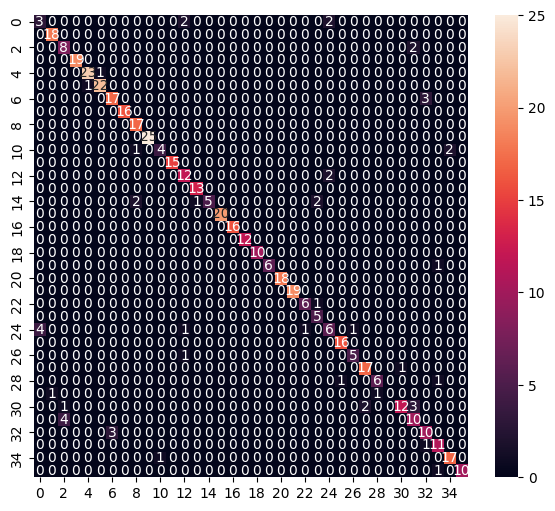

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.95      1.00      0.97        18
           2       0.62      0.80      0.70        10
           3       1.00      1.00      1.00        19
           4       0.96      0.96      0.96        24
           5       0.96      0.96      0.96        23
           6       0.85      0.85      0.85        20
           7       1.00      1.00      1.00        16
           8       0.85      1.00      0.92        17
           9       1.00      1.00      1.00        25
          10       0.80      0.57      0.67         7
          11       1.00      1.00      1.00        15
          12       0.75      0.86      0.80        14
          13       0.93      1.00      0.96        13
          14       1.00      0.50      0.67        10
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        16
     

d:\BINUS\Assignments\Semester 3\AI\SignoAI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\BINUS\Assignments\Semester 3\AI\SignoAI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\BINUS\Assignments\Semester 3\AI\SignoAI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)